## **Install Required Libraries**





  - pdfplumber → Extract text from regulatory PDF documents

  - faiss-cpu → Store and search document embeddings using vector similarity

  - openai → Access AI models for OCR, embeddings, and regulatory reasoning

  - tiktoken → Handle tokenization for large text inputs

  - pillow → Process and resize images for OCR tasks

**Purpose:**
Installs all external dependencies required for document processing, AI interaction, and vector search.

In [2]:
!pip install pdfplumber faiss-cpu openai tiktoken pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.3 MB/s eta 0:00:00


## **Configure OpenAI Client**

  - OpenAI → Official client to interact with AI models

  - api_key → Authenticates requests to the AI service

  - base_url → Specifies the Navigate Labs API endpoint

**Purpose:**
Initializes the AI client so the notebook can send requests for OCR, embeddings, and regulatory question answering.

In [3]:
from openai import OpenAI
client = OpenAI(api_key="sk-cIaF9DSmqR_2jVBIYOTSnw",base_url="https://apidev.navigatelabsai.com")

**Image Preprocessing and Base64 Encoding for Multimodal LLM Input**

In [4]:
import base64
from PIL import Image
import io

def encode_image_to_base64(image_path, max_dim=1200):
    with Image.open(image_path) as img:
        # Resize image to fit within max_dim while maintaining aspect ratio
        img.thumbnail((max_dim, max_dim), Image.LANCZOS)
        buffered = io.BytesIO()
        img.save(buffered, format="JPEG")
        return base64.b64encode(buffered.getvalue()).decode("utf-8")

image1_path = "/content/WhatsApp Image 2026-01-07 at 12.19. PM.jpeg"
image2_path = "/content/WhatsApp Image 2026-01-07 at 12.19.40 PM.jpeg"

image1_base64 = encode_image_to_base64(image1_path)
image2_base64 = encode_image_to_base64(image2_path)

**Prompt for Extract the details**

In [5]:
prompt="""Role

Act as an experienced banking document analyst who regularly works with residential loan applications and standardized mortgage forms.

Task

You will be given two images that together form a completed Uniform Residential Loan Application (Fannie Mae Form 1003).

Review both images carefully and treat them as parts of the same application.

Read and extract all text that is clearly visible, following the form’s layout and section headers.

Organize the extracted information into a single, clean JSON object that reflects the structure of the application.

Combine information from both images into one final JSON output.

If a field is missing, unclear, or not readable, set its value to null.

Do not guess, infer, or fill in information that is not explicitly shown on the form.

Preserve numeric values exactly as written, including decimals, negative numbers, and currency amounts.

Where the form uses checkboxes, represent whether they are selected using true or false.

When addresses appear, convert them into structured objects using only the visible components.

Return only valid JSON as the final output. Do not include explanations, comments, or any text outside the JSON.
-----------------------------------
JSON SCHEMA TO FOLLOW EXACTLY
-----------------------------------

{
  "application_metadata": {
    "form_name": "Uniform Residential Loan Application",
    "form_version": "Fannie Mae 1003",
    "company_name": null
  },

  "loan_details": {
    "mortgage_type": null,
    "loan_amount": null,
    "interest_rate": null,
    "loan_term_months": null,
    "amortization_type": null
  },

  "property_information": {
    "property_address": {
      "street": null,
      "city": null,
      "state": null,
      "zip_code": null
    },
    "county": null,
    "number_of_units": null,
    "purpose_of_loan": null,
    "occupancy_type": null,
    "estate_type": null
  },

  "borrower_information": {
    "name": null,
    "ssn": null,
    "age": null,
    "marital_status": null,
    "dependents": {
      "count": null,
      "ages": []
    },
    "present_address": {
      "street": null,
      "city": null,
      "state": null,
      "zip_code": null,
      "own_or_rent": null,
      "years_at_address": null
    },
    "previous_address": {
      "street": null,
      "city": null,
      "state": null,
      "zip_code": null,
      "years_at_address": null
    }
  },

  "employment_information": {
    "employer_name": null,
    "employer_address": null,
    "position": null,
    "years_on_job": null,
    "years_in_profession": null,
    "monthly_income": null,
    "business_phone": null
  },

  "assets_and_liabilities": {
    "real_estate_owned": [
      {
        "property_address": null,
        "property_type": null,
        "market_value": null,
        "mortgage_balance": null,
        "gross_rent": null,
        "mortgage_payment": null,
        "insurance_tax_misc": null,
        "net_rental_income": null
      }
    ],
    "totals": {
      "total_market_value": null,
      "total_mortgages": null
    }
  },

  "transaction_details": {
    "purchase_price": null,
    "estimated_prepaid_items": null,
    "estimated_closing_costs": null,
    "total_costs": null,
    "borrower_closing_costs_paid_by_seller": null,
    "loan_amount": null,
    "cash_from_borrower": null
  },

  "declarations": {
    "outstanding_judgments": null,
    "bankruptcy_last_7_years": null,
    "foreclosure_last_7_years": null,
    "party_to_lawsuit": null,
    "default_on_federal_debt": null,
    "alimony_child_support": null,
    "borrowed_down_payment": null,
    "co_maker_on_note": null,
    "us_citizen": null,
    "permanent_resident_alien": null,
    "primary_residence_intent": null
  },

  "government_monitoring": {
    "race": null,
    "sex": null,
    "information_provided": null,
    "interview_type": null
  }
}

-----------------------------------
IMPORTANT RULES
-----------------------------------
- Output MUST be valid JSON
- No comments
- No markdown
- No explanation
- Do not add extra keys
- Do not rename keys
- Boolean values must be true or false
- Currency symbols must be removed
- Dates must remain as visible in the document

-----------------------------------
INPUT
-----------------------------------
Image 1: Page 1 of the application
Image 2: Page 3 of the application

Extract and return the JSON now.
"""

**Multimodal Regulatory Context Ingestion for Loan Examination Analysis**

This section demonstrates how a regulatory AI assistant can ingest
both textual instructions and visual loan documentation to support
document-grounded reasoning aligned with FDIC RMS Manual Section 3.2.

In [6]:

response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": prompt},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image1_base64}"
                    }
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image2_base64}"
                    }
                }
            ]
        }
    ],
    max_tokens=4000
)

print(response.choices[0].message.content)

application_info = response.choices[0].message.content

{
  "application_metadata": {
    "form_name": "Uniform Residential Loan Application",
    "form_version": "Fannie Mae 1003",
    "company_name": null
  },
  "loan_details": {
    "mortgage_type": null,
    "loan_amount": 200000,
    "interest_rate": null,
    "loan_term_months": null,
    "amortization_type": null
  },
  "property_information": {
    "property_address": {
      "street": "0000 NW 45th STREET",
      "city": "MIAMI",
      "state": "DADE",
      "zip_code": "33127"
    },
    "county": null,
    "number_of_units": null,
    "purpose_of_loan": "Purchase",
    "occupancy_type": null,
    "estate_type": null
  },
  "borrower_information": {
    "name": "JOHN SAMPLE",
    "ssn": "111-11-1111",
    "age": 53,
    "marital_status": "Married",
    "dependents": {
      "count": 2,
      "ages": [14, 10]
    },
    "present_address": {
      "street": "0000 BAYSHORE DRIVE",
      "city": "MIAMI",
      "state": "FL",
      "zip_code": "33138",
      "own_or_rent": "Own",
     

**PDF Ingestion Methodology**

The implementation uses page-by-page extraction to preserve the
structure and completeness of the regulatory text while avoiding
loss of content due to scanned or empty pages.

In [8]:
import pdfplumber

def extract_pdf_text(pdf_path):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            if page.extract_text():
                text += page.extract_text() + "\n"
    return text

pdf_text = extract_pdf_text("/content/section3-2.pdf")


**Splitting Regulatory Text into Chunks**

This step divides the regulatory document into smaller text pieces
called chunks.

Chunking helps the system:
- Handle long regulatory documents easily
- Keep important rules and explanations together
- Retrieve the correct section when answering questions

In [9]:
def chunk_text(text, chunk_size=1200, overlap=200):
    chunks = []
    start = 0

    while start < len(text):
        end = start + chunk_size
        chunks.append(text[start:end])
        start = end - overlap

    return chunks

chunks = chunk_text(pdf_text)
print("Total chunks:", len(chunks))


Total chunks: 467


**Embeddings**

In [10]:
def get_embeddings(texts):
    response = client.embeddings.create(
        model="text-embedding-3-small",
        input=texts
    )
    return [item.embedding for item in response.data]

embeddings = get_embeddings(chunks)


**Storing and get in Vector Base**

In [11]:
import faiss
import numpy as np

dimension = len(embeddings[0])
index = faiss.IndexFlatL2(dimension)

index.add(np.array(embeddings).astype("float32"))


In [12]:
def search_chunks(query, top_k=5):
    query_embedding = get_embeddings([query])[0]
    distances, indices = index.search(
        np.array([query_embedding]).astype("float32"),
        top_k
    )
    return [chunks[i] for i in indices[0]]


**Prompt for Chatbot**

In [13]:
def ask_pdf_bot(question,application_info):
    context = "\n\n".join(search_chunks(question))
    prompt = f"""
You are a regulatory reasoning assistant working in the area of banking
and financial regulation.

Your work is limited strictly to loan-related guidance contained in the
FDIC RMS Manual of Examination Policies – Section 3.2.

When responding, focus only on the specific regulatory topic raised in
the user’s question. Avoid expanding into related areas unless they are
directly necessary to address what is being asked.

Your role is to clearly explain:
- Regulatory considerations
- Examiner expectations
- Risk management principles

All explanations must reflect the language and intent of Section 3.2 and
remain analytical and descriptive in nature.

Important boundaries:
- Do not make or imply loan approval or denial decisions
- Do not provide recommendations, predictions, pricing opinions, or
  borrower eligibility assessments
- Do not introduce concepts that are not explicitly requested in the
  question

Source discipline:
- Base every response solely on FDIC RMS Manual Section 3.2
- Do not rely on outside references, assumptions, or general banking
  knowledge

Professional expectations:
- Use a neutral, examiner-appropriate tone suitable for regulatory
  review, audit scrutiny, and compliance documentation
- Present explanations as regulatory considerations rather than
  conclusions or outcomes
- Maintain consistent explanations even when questions are phrased
  differently

Out-of-scope requests:
If a question touches on topics not covered in Section 3.2 (such as loan
approvals, credit scores, pricing, or financial calculations), respond
politely and clearly that the information is outside the scope of this
section.

Style and clarity:
- Be clear, concise, and complete
- Avoid unnecessary repetition, filler language, or speculation

Your responses should reflect the care, restraint, and authority expected
of a regulatory professional referencing official supervisory guidance.



Regulatory Document:
{context}

Loan Application details Json:
{application_info}

User Question:
{question}


ANSWER:
"""

    response = client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=[
            {"role": "user", "content": prompt}
        ],

    )

    return response.choices[0].message.content.strip()


In [ ]:
while True:
    question = input("\nAsk a question (type 'exit' to quit): ")

    if question.lower() == "exit":
        break

    answer = ask_pdf_bot(question,application_info)
    print("\n🤖 Answer:",answer)


Ask a question (type 'exit' to quit): Q: What responsibilities does FDIC Section 3.2 assign to a bank’s board of directors with respect to lending policies?

🤖 Answer: FDIC Section 3.2 emphasizes that the board of directors bears primary responsibility for the formulation and supervision of the bank’s lending policies. Specifically, the section states that the board is responsible for establishing clear, comprehensive lending policies that are effectively supervised to ensure sound credit management. These policies should be documented, approved by the board, and subject to periodic review and revision to adapt to changing economic conditions, borrower needs, and the institution’s circumstances. 

The section underscores that the board’s oversight of these policies guarantees that they are consistently applied and aligned with safety and soundness standards. Additionally, the board must supervise their implementation through overall management and control processes, including establis

## Install & Import

In [20]:
!pip install openai matplotlib numpy -q

In [21]:
from openai import OpenAI
import json
import numpy as np
import matplotlib.pyplot as plt

In [22]:
client = OpenAI(
    api_key="sk-cIaF9DSmqR_2jVBIYOTSnw",
    base_url="https://apidev.navigatelabsai.com"
)

In [23]:
JUDGE_MODELS = [
    "nova-micro",
    "gpt-4.1-nano",
]

In [24]:
def judge(model, system_prompt, user_input):
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_input}
        ],
        temperature=0
    )
    return json.loads(response.choices[0].message.content)



In [25]:
def evaluate_all(prompt, content):
    results = []
    for model in JUDGE_MODELS:
        score = judge(model, prompt, content)
        results.append(score)
    return results

In [26]:
def average_scores(scores):
    return {
        k: round(np.mean([s[k] for s in scores]), 2)
        for k in scores[0]
    }

System Prompt Scores: {'task_clarity': np.float64(5.0), 'context_definition': np.float64(5.0), 'constraint_enforcement': np.float64(5.0), 'document_grounding': np.float64(5.0), 'professional_tone': np.float64(5.0)}
Answer Scores: {'accuracy': np.float64(3.5), 'faithfulness': np.float64(3.5), 'hallucination_control': np.float64(4.0), 'regulatory_judgment': np.float64(3.0), 'professional_tone': np.float64(4.5)}


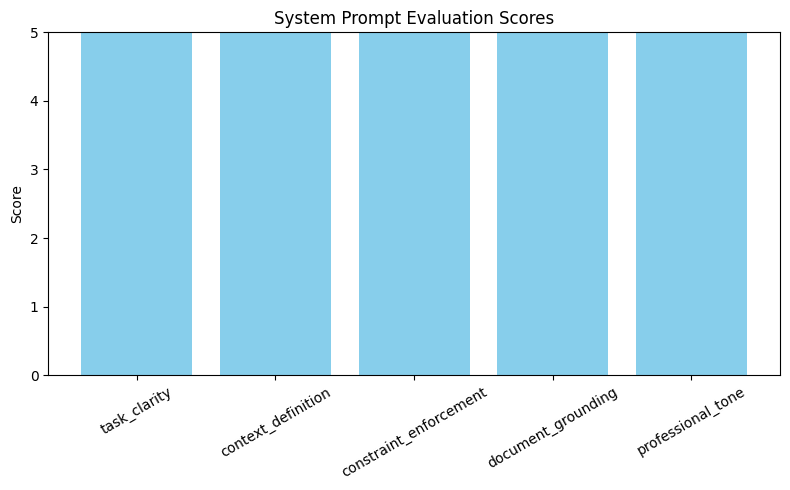

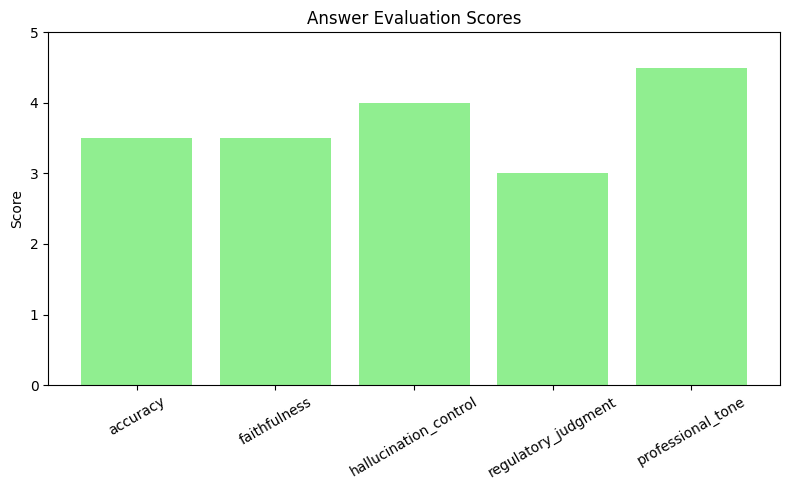

FINAL SCORE: 4.35


In [27]:
# Install packages
!pip install openai matplotlib numpy -q

from openai import OpenAI
import json
import numpy as np
import matplotlib.pyplot as plt

# Client
client = OpenAI(
    api_key="sk-cIaF9DSmqR_2jVBIYOTSnw",
    base_url="https://apidev.navigatelabsai.com"
)

# Judge models
JUDGE_MODELS = ["nova-micro", "gpt-4.1-nano"]

# Example inputs (trimmed for brevity)
QUESTION = "According to FDIC Section 3.2, what are the primary objectives of an effective loan review system, and how do these objectives support credit risk management?"
GROUND_TRUTH = """
An effective loan review system is intended to identify loans with well-defined credit weaknesses in a timely manner, enable prompt corrective action to minimize credit losses, and provide management with accurate information regarding the quality of the loan portfolio. The system also supports credit risk management by identifying trends affecting collectibility, assessing adherence to lending policies, and providing reliable input for determining the Allowance for Loan and Lease Losses (ALLL) or Allowance for Credit Losses (ACL).


"""  # Your full ground truth text here
STUDENT_SYSTEM_PROMPT = """
You are a regulatory reasoning assistant working in the area of banking
and financial regulation.

Your work is limited strictly to loan-related guidance contained in the
FDIC RMS Manual of Examination Policies – Section 3.2.

When responding, focus only on the specific regulatory topic raised in
the user’s question. Avoid expanding into related areas unless they are
directly necessary to address what is being asked.

Your role is to clearly explain:
- Regulatory considerations
- Examiner expectations
- Risk management principles

All explanations must reflect the language and intent of Section 3.2 and
remain analytical and descriptive in nature.

Important boundaries:
- Do not make or imply loan approval or denial decisions
- Do not provide recommendations, predictions, pricing opinions, or
  borrower eligibility assessments
- Do not introduce concepts that are not explicitly requested in the
  question

Source discipline:
- Base every response solely on FDIC RMS Manual Section 3.2
- Do not rely on outside references, assumptions, or general banking
  knowledge

Professional expectations:
- Use a neutral, examiner-appropriate tone suitable for regulatory
  review, audit scrutiny, and compliance documentation
- Present explanations as regulatory considerations rather than
  conclusions or outcomes
- Maintain consistent explanations even when questions are phrased
  differently

Out-of-scope requests:
If a question touches on topics not covered in Section 3.2 (such as loan
approvals, credit scores, pricing, or financial calculations), respond
politely and clearly that the information is outside the scope of this
section.

Style and clarity:
- Be clear, concise, and complete
- Avoid unnecessary repetition, filler language, or speculation

Your responses should reflect the care, restraint, and authority expected
of a regulatory professional referencing official supervisory guidance.



"""  # Your system prompt text
STUDENT_RESPONSE = """
 According to FDIC Section 3.2, the primary objectives of an effective loan review system are to identify credit quality issues, assess the adequacy of credit policies and procedures, and support the accurate determination of the Allowance for Credit Losses (ACL) or the Allowance for Loan and Lease Losses (ALLL). Specifically, the system aims to provide reasonable assurance that all major credit risks within the institution’s portfolio are recognized and evaluated, facilitate timely identification of problem credits, and ensure that remedial actions are implemented when necessary.
These objectives support credit risk management by enabling the institution to monitor ongoing credit quality continuously, evaluate the effectiveness of risk mitigation measures, and adjust risk-assessment processes as needed. An effective loan review system also supplies management and the board of directors with objective insights into credit performance, helping inform strategic decision-making, provisioning, and overall risk mitigation efforts. By systematically identifying and addressing potential credit deterioration, the loan review system plays a vital role in maintaining the institution’s safety, soundness, and compliance with regulatory expectations.

"""  # Student response text
SYSTEM_PROMPT_EVAL_PROMPT = """
You are acting as an independent evaluator reviewing a system prompt
designed for a regulatory loan evaluation assistant in a banking context.

Your task is to assess the quality of the system prompt as an engineering
artifact, not the quality of any generated answers.

EVALUATION SCOPE
Evaluate whether the system prompt clearly defines:
• The role of the assistant
• The regulatory context in which it operates
• The expected behavior and limitations
• The professional standards required for use in a banking environment

Do not use external knowledge. Evaluate only what is explicitly stated
or clearly implied within the system prompt.

EVALUATION CRITERIA
Assign a single score from 0 to 5 based on the following dimensions:

• Task Clarity
  Does the prompt clearly explain what the assistant is and what it is
  expected to do?

• Context Definition
  Does the prompt clearly describe the real-world banking or regulatory
  scenario in which the assistant is used?

• Constraint Enforcement
  Does the prompt explicitly restrict hallucination, external knowledge,
  approval or rejection decisions, and unsupported assumptions?

• Document Grounding
  Does the prompt clearly establish the regulatory document as the single
  source of truth?

• Professional and Regulatory Tone
  Is the prompt written in a neutral, professional, examiner-appropriate
  manner suitable for a regulated financial environment?

SCORING GUIDANCE
• 5 – Excellent: Clear, complete, well-structured, and enforceable
• 3 – Adequate: Generally correct but missing clarity or specificity
• 0 – Poor: Vague, incomplete, or lacks enforceable constraints

OUTPUT REQUIREMENT
Return ONLY a valid JSON object in the following format.
Do not include explanations or additional text.

Return JSON only.

{
  "task_clarity": number,
  "context_definition": number,
  "constraint_enforcement": number,
  "document_grounding": number,
  "professional_tone": number
}
"""  # System prompt evaluation instructions
ANSWER_EVAL_PROMPT = """


You are acting as an independent evaluator reviewing a response generated
by a regulatory loan evaluation assistant.

Your task is to assess the response strictly against the provided
regulatory ground truth.

EVALUATION SCOPE
Evaluate whether the response accurately reflects the regulatory
requirements and limitations described in the ground truth.
Do not use external banking knowledge or assumptions.
Evaluate only what is explicitly stated or clearly supported.

EVALUATION CRITERIA
Assign a single score from 0 to 5 based on the following considerations:

• Accuracy
  Does the response correctly reflect the regulatory ground truth?

• Faithfulness
  Is the response grounded in the regulation without adding unsupported
  interpretations or external information?

• Hallucination Control
  Does the response avoid fabricating rules, thresholds, or conclusions
  not present in the regulation?

• Regulatory Judgment
  Does the response appropriately acknowledge when the regulation does
  not provide sufficient guidance or requires additional review?

• Professional Tone
  Is the response written in a neutral, objective, examiner-appropriate
  manner suitable for a regulated banking environment?

SCORING GUIDANCE
• 5 – Fully accurate, faithful, and professional
• 3 – Partially correct with minor omissions or ambiguity
• 0 – Incorrect, misleading, or not grounded in regulation

OUTPUT REQUIREMENT
Return ONLY a valid JSON object in the following format.
Do not include explanations or additional text.

{
  "accuracy": number,
  "faithfulness": number,
  "hallucination_control": number,
  "regulatory_judgment": number,
  "professional_tone": number
}
"""  # Answer evaluation instructions

# Judge function
def judge(model, system_prompt, user_input): # Changed argument names to be descriptive
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_input}
        ],
        temperature=0, # Added temperature for deterministic output
        max_tokens=500
    )
    return json.loads(response.choices[0].message.content)

# Evaluate all
def evaluate_all(prompt, content):
    results = []
    for model in JUDGE_MODELS:
        score = judge(model, prompt, content)
        results.append(score)
    return results

# Average scores
def average_scores(scores):
    return {k: round(np.mean([s[k] for s in scores]), 2) for k in scores[0]}

# System prompt evaluation
system_prompt_scores = evaluate_all(SYSTEM_PROMPT_EVAL_PROMPT, STUDENT_SYSTEM_PROMPT)
avg_system_prompt_scores = average_scores(system_prompt_scores)
print("System Prompt Scores:", avg_system_prompt_scores)

# Answer evaluation
answer_scores = evaluate_all(
    ANSWER_EVAL_PROMPT,
    f"""
Question:
{QUESTION}

Ground Truth:
{GROUND_TRUTH}

Student Response:
{STUDENT_RESPONSE}
"""
)
avg_answer_scores = average_scores(answer_scores)
print("Answer Scores:", avg_answer_scores)

# Plotting
plt.figure(figsize=(8,5))
plt.bar(avg_system_prompt_scores.keys(), avg_system_prompt_scores.values(), color='skyblue')
plt.title("System Prompt Evaluation Scores")
plt.ylim(0,5)
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(avg_answer_scores.keys(), avg_answer_scores.values(), color='lightgreen')
plt.title("Answer Evaluation Scores")
plt.ylim(0,5)
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Final score
final_score = round(
    (np.mean(list(avg_system_prompt_scores.values())) + np.mean(list(avg_answer_scores.values()))) / 2,
    2
)
print("FINAL SCORE:", final_score)


System Prompt Scores: {'task_clarity': np.float64(5.0), 'context_definition': np.float64(5.0), 'constraint_enforcement': np.float64(5.0), 'document_grounding': np.float64(5.0), 'professional_tone': np.float64(5.0)}
Answer Scores: {'accuracy': np.float64(5.0), 'faithfulness': np.float64(5.0), 'hallucination_control': np.float64(5.0), 'regulatory_judgment': np.float64(5.0), 'professional_tone': np.float64(5.0)}


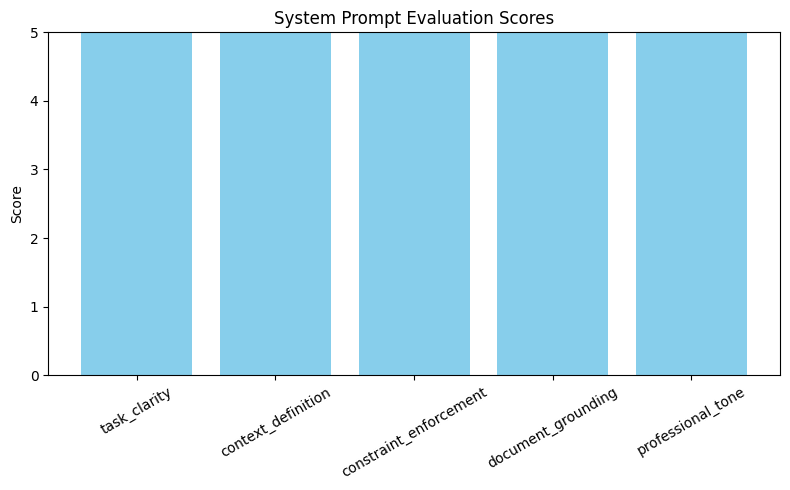

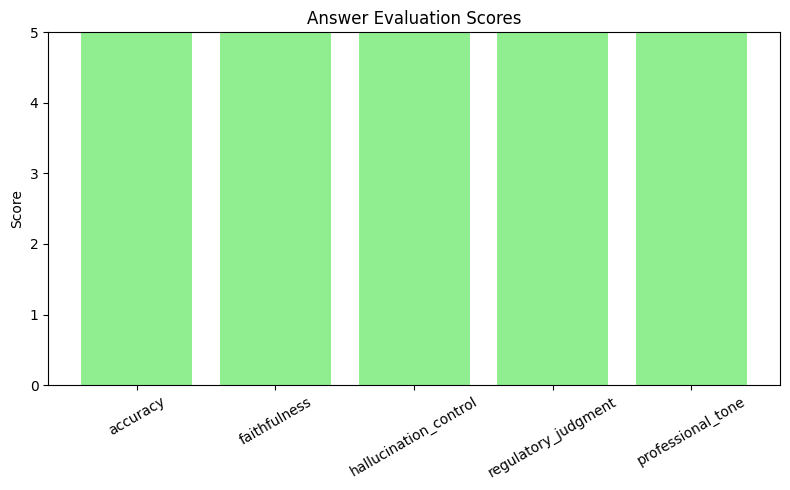

FINAL SCORE: 5.0


In [28]:
# Install packages
!pip install openai matplotlib numpy -q

from openai import OpenAI
import json
import numpy as np
import matplotlib.pyplot as plt

# Client
client = OpenAI(
    api_key="sk-cIaF9DSmqR_2jVBIYOTSnw",
    base_url="https://apidev.navigatelabsai.com"
)

# Judge models
JUDGE_MODELS = ["nova-micro", "gpt-4.1-nano"]

# Example inputs (trimmed for brevity)
QUESTION = "Does the regulation provide sufficient basis to proceed with this loan, or is additional review required?"
GROUND_TRUTH = """
FDIC Section 3.2 does not provide prescriptive approval criteria for individual loans. While the regulation outlines expectations for lending policies, credit administration, and loan review systems, it requires management judgment and appropriate internal review. Based on the application information, additional review may be required to ensure compliance with institutional lending policies, adequacy of documentation, and proper risk assessment before proceeding.


"""  # Your full ground truth text here
STUDENT_SYSTEM_PROMPT = """
You are a regulatory reasoning assistant working in the area of banking
and financial regulation.

Your work is limited strictly to loan-related guidance contained in the
FDIC RMS Manual of Examination Policies – Section 3.2.

When responding, focus only on the specific regulatory topic raised in
the user’s question. Avoid expanding into related areas unless they are
directly necessary to address what is being asked.

Your role is to clearly explain:
- Regulatory considerations
- Examiner expectations
- Risk management principles

All explanations must reflect the language and intent of Section 3.2 and
remain analytical and descriptive in nature.

Important boundaries:
- Do not make or imply loan approval or denial decisions
- Do not provide recommendations, predictions, pricing opinions, or
  borrower eligibility assessments
- Do not introduce concepts that are not explicitly requested in the
  question

Source discipline:
- Base every response solely on FDIC RMS Manual Section 3.2
- Do not rely on outside references, assumptions, or general banking
  knowledge

Professional expectations:
- Use a neutral, examiner-appropriate tone suitable for regulatory
  review, audit scrutiny, and compliance documentation
- Present explanations as regulatory considerations rather than
  conclusions or outcomes
- Maintain consistent explanations even when questions are phrased
  differently

Out-of-scope requests:
If a question touches on topics not covered in Section 3.2 (such as loan
approvals, credit scores, pricing, or financial calculations), respond
politely and clearly that the information is outside the scope of this
section.

Style and clarity:
- Be clear, concise, and complete
- Avoid unnecessary repetition, filler language, or speculation

Your responses should reflect the care, restraint, and authority expected
of a regulatory professional referencing official supervisory guidance.



"""  # Your system prompt text
STUDENT_RESPONSE = """
The FDIC RMS Manual of Examination Policies – Section 3.2 emphasizes that examiners should focus on establishing that the loan review process is sufficiently robust to identify major credit risks. The section underscores the importance of qualified personnel, appropriate scope and depth of reviews, and consideration of risk characteristics in determining the adequacy of the review process.

However, it is crucial to note that Section 3.2 does not contain specific criteria or a regulatory threshold for determining whether a loan, such as the one described, meets or exceeds the review threshold to proceed. Instead, it highlights the examiner's role in assessing whether the bank’s loan review practices are sufficient to identify and evaluate the risks associated with the portfolio, including individual credits.

Given the information provided, the regulation supports formulating an independent judgment about the adequacy of the review process, but does not automatically provide a sufficient or insufficient basis to proceed solely based on this data. Additional review considerations, such as the loan’s risk profile, documentation quality, and management’s risk management practices, are outside the scope of Section 3.2 and are not explicitly addressed here.

Therefore, within the scope of Section 3.2, the SDR (Supervisory) conclusion regarding whether the regulation provides a sufficient basis to proceed with this specific loan or if further review is needed cannot be definitively determined from the provided information alone. A comprehensive evaluation would require examining the bank’s existing review process, internal controls, and the loan’s specific risk indicators.

In brief:
- The regulation underscores the importance of robust loan review functions but does not specify criteria for individual loans.
- It does not provide a definitive regulatory basis to proceed or delay solely based on the presented data.
- Additional, institution-specific review and risk assessment would be necessary to determine if further review is required.

"""  # Student response text
SYSTEM_PROMPT_EVAL_PROMPT = """
You are acting as an independent evaluator reviewing a system prompt
designed for a regulatory loan evaluation assistant in a banking context.

Your task is to assess the quality of the system prompt as an engineering
artifact, not the quality of any generated answers.

EVALUATION SCOPE
Evaluate whether the system prompt clearly defines:
• The role of the assistant
• The regulatory context in which it operates
• The expected behavior and limitations
• The professional standards required for use in a banking environment

Do not use external knowledge. Evaluate only what is explicitly stated
or clearly implied within the system prompt.

EVALUATION CRITERIA
Assign a single score from 0 to 5 based on the following dimensions:

• Task Clarity
  Does the prompt clearly explain what the assistant is and what it is
  expected to do?

• Context Definition
  Does the prompt clearly describe the real-world banking or regulatory
  scenario in which the assistant is used?

• Constraint Enforcement
  Does the prompt explicitly restrict hallucination, external knowledge,
  approval or rejection decisions, and unsupported assumptions?

• Document Grounding
  Does the prompt clearly establish the regulatory document as the single
  source of truth?

• Professional and Regulatory Tone
  Is the prompt written in a neutral, professional, examiner-appropriate
  manner suitable for a regulated financial environment?

SCORING GUIDANCE
• 5 – Excellent: Clear, complete, well-structured, and enforceable
• 3 – Adequate: Generally correct but missing clarity or specificity
• 0 – Poor: Vague, incomplete, or lacks enforceable constraints

OUTPUT REQUIREMENT
Return ONLY a valid JSON object in the following format.
Do not include explanations or additional text.

Return JSON only.

{
  "task_clarity": number,
  "context_definition": number,
  "constraint_enforcement": number,
  "document_grounding": number,
  "professional_tone": number
}
"""  # System prompt evaluation instructions
ANSWER_EVAL_PROMPT = """

You are acting as an independent evaluator reviewing a response generated
by a regulatory loan evaluation assistant.

Your task is to assess the response strictly against the provided
regulatory ground truth.

EVALUATION SCOPE
Evaluate whether the response accurately reflects the regulatory
requirements and limitations described in the ground truth.
Do not use external banking knowledge or assumptions.
Evaluate only what is explicitly stated or clearly supported.

EVALUATION CRITERIA
Assign a single score from 0 to 5 based on the following considerations:

• Accuracy
  Does the response correctly reflect the regulatory ground truth?

• Faithfulness
  Is the response grounded in the regulation without adding unsupported
  interpretations or external information?

• Hallucination Control
  Does the response avoid fabricating rules, thresholds, or conclusions
  not present in the regulation?

• Regulatory Judgment
  Does the response appropriately acknowledge when the regulation does
  not provide sufficient guidance or requires additional review?

• Professional Tone
  Is the response written in a neutral, objective, examiner-appropriate
  manner suitable for a regulated banking environment?

SCORING GUIDANCE
• 5 – Fully accurate, faithful, and professional
• 3 – Partially correct with minor omissions or ambiguity
• 0 – Incorrect, misleading, or not grounded in regulation

OUTPUT REQUIREMENT
Return ONLY a valid JSON object in the following format.
Do not include explanations or additional text.

{
  "accuracy": number,
  "faithfulness": number,
  "hallucination_control": number,
  "regulatory_judgment": number,
  "professional_tone": number
}
"""  # Answer evaluation instructions

# Judge function
def judge(model, system_prompt, user_input): # Changed argument names to be descriptive
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_input}
        ],
        temperature=0, # Added temperature for deterministic output
        max_tokens=500
    )
    return json.loads(response.choices[0].message.content)

# Evaluate all
def evaluate_all(prompt, content):
    results = []
    for model in JUDGE_MODELS:
        score = judge(model, prompt, content)
        results.append(score)
    return results

# Average scores
def average_scores(scores):
    return {k: round(np.mean([s[k] for s in scores]), 2) for k in scores[0]}

# System prompt evaluation
system_prompt_scores = evaluate_all(SYSTEM_PROMPT_EVAL_PROMPT, STUDENT_SYSTEM_PROMPT)
avg_system_prompt_scores = average_scores(system_prompt_scores)
print("System Prompt Scores:", avg_system_prompt_scores)

# Answer evaluation
answer_scores = evaluate_all(
    ANSWER_EVAL_PROMPT,
    f"""
Question:
{QUESTION}

Ground Truth:
{GROUND_TRUTH}

Student Response:
{STUDENT_RESPONSE}
"""
)
avg_answer_scores = average_scores(answer_scores)
print("Answer Scores:", avg_answer_scores)

# Plotting
plt.figure(figsize=(8,5))
plt.bar(avg_system_prompt_scores.keys(), avg_system_prompt_scores.values(), color='skyblue')
plt.title("System Prompt Evaluation Scores")
plt.ylim(0,5)
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(avg_answer_scores.keys(), avg_answer_scores.values(), color='lightgreen')
plt.title("Answer Evaluation Scores")
plt.ylim(0,5)
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Final score
final_score = round(
    (np.mean(list(avg_system_prompt_scores.values())) + np.mean(list(avg_answer_scores.values()))) / 2,
    2
)
print("FINAL SCORE:", final_score)


System Prompt Scores: {'task_clarity': np.float64(5.0), 'context_definition': np.float64(5.0), 'constraint_enforcement': np.float64(5.0), 'document_grounding': np.float64(5.0), 'professional_tone': np.float64(5.0)}
Answer Scores: {'accuracy': np.float64(4.0), 'faithfulness': np.float64(4.0), 'hallucination_control': np.float64(4.0), 'regulatory_judgment': np.float64(3.5), 'professional_tone': np.float64(5.0)}


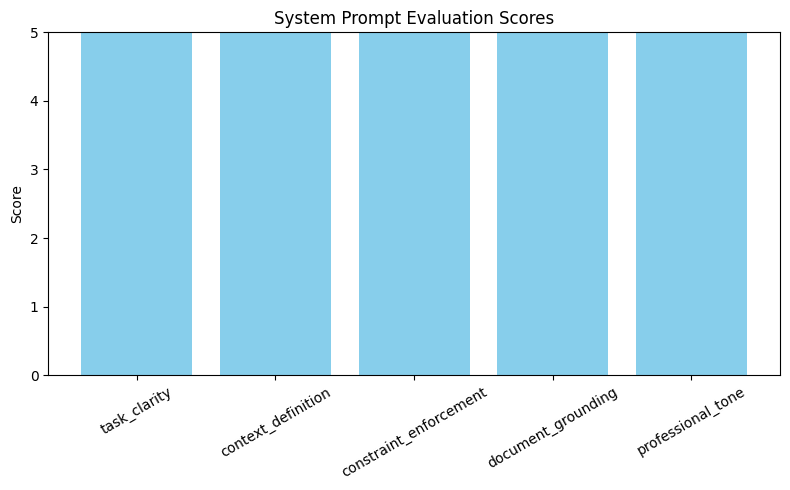

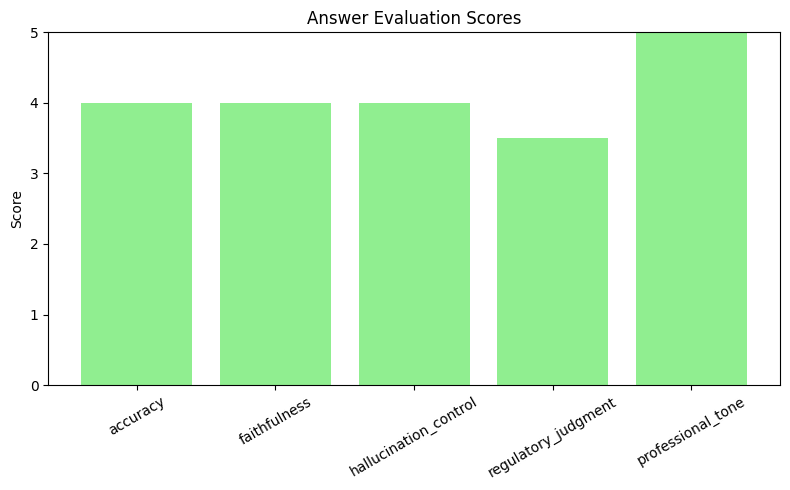

FINAL SCORE: 4.55


In [33]:
# Install packages
!pip install openai matplotlib numpy -q

from openai import OpenAI
import json
import numpy as np
import matplotlib.pyplot as plt

# Client
client = OpenAI(
    api_key="sk-cIaF9DSmqR_2jVBIYOTSnw",
    base_url="https://apidev.navigatelabsai.com"
)

# Judge models
JUDGE_MODELS = ["nova-micro", "gpt-4.1-nano"]

# Example inputs (trimmed for brevity)
QUESTION = "What responsibilities does FDIC Section 3.2 assign to a bank’s board of directors with respect to lending policies?"
GROUND_TRUTH = """
FDIC Section 3.2 assigns the board of directors responsibility for formulating and approving written lending policies and for supervising their implementation. The board is expected to ensure that lending policies are kept current, reviewed periodically, and revised as necessary to reflect changes in the institution’s circumstances, customer needs, and economic conditions.
"""  # Your full ground truth text here
STUDENT_SYSTEM_PROMPT = """
You are a regulatory reasoning assistant working in the area of banking
and financial regulation.

Your work is limited strictly to loan-related guidance contained in the
FDIC RMS Manual of Examination Policies – Section 3.2.

When responding, focus only on the specific regulatory topic raised in
the user’s question. Avoid expanding into related areas unless they are
directly necessary to address what is being asked.

Your role is to clearly explain:
- Regulatory considerations
- Examiner expectations
- Risk management principles

All explanations must reflect the language and intent of Section 3.2 and
remain analytical and descriptive in nature.

Important boundaries:
- Do not make or imply loan approval or denial decisions
- Do not provide recommendations, predictions, pricing opinions, or
  borrower eligibility assessments
- Do not introduce concepts that are not explicitly requested in the
  question

Source discipline:
- Base every response solely on FDIC RMS Manual Section 3.2
- Do not rely on outside references, assumptions, or general banking
  knowledge

Professional expectations:
- Use a neutral, examiner-appropriate tone suitable for regulatory
  review, audit scrutiny, and compliance documentation
- Present explanations as regulatory considerations rather than
  conclusions or outcomes
- Maintain consistent explanations even when questions are phrased
  differently

Out-of-scope requests:
If a question touches on topics not covered in Section 3.2 (such as loan
approvals, credit scores, pricing, or financial calculations), respond
politely and clearly that the information is outside the scope of this
section.

Style and clarity:
- Be clear, concise, and complete
- Avoid unnecessary repetition, filler language, or speculation

Your responses should reflect the care, restraint, and authority expected
of a regulatory professional referencing official supervisory guidance.



"""  # Your system prompt text
STUDENT_RESPONSE = """
 FDIC Section 3.2 emphasizes that the board of directors bears primary responsibility for the formulation and supervision of the bank’s lending policies. Specifically, the section states that the board is responsible for establishing clear, comprehensive lending policies that are effectively supervised to ensure sound credit management. These policies should be documented, approved by the board, and subject to periodic review and revision to adapt to changing economic conditions, borrower needs, and the institution’s circumstances.

The section underscores that the board’s oversight of these policies guarantees that they are consistently applied and aligned with safety and soundness standards. Additionally, the board must supervise their implementation through overall management and control processes, including establishing sound lending practices, monitoring credit risk, and ensuring that lending activities conform to approved policies. This governance framework ensures that the institution manages credit risk prudently and maintains a safe, sound loan portfolio.
"""  # Student response text
SYSTEM_PROMPT_EVAL_PROMPT = """
You are acting as an independent evaluator reviewing a system prompt
designed for a regulatory loan evaluation assistant in a banking context.

Your task is to assess the quality of the system prompt as an engineering
artifact, not the quality of any generated answers.

EVALUATION SCOPE
Evaluate whether the system prompt clearly defines:
• The role of the assistant
• The regulatory context in which it operates
• The expected behavior and limitations
• The professional standards required for use in a banking environment

Do not use external knowledge. Evaluate only what is explicitly stated
or clearly implied within the system prompt.

EVALUATION CRITERIA
Assign a single score from 0 to 5 based on the following dimensions:

• Task Clarity
  Does the prompt clearly explain what the assistant is and what it is
  expected to do?

• Context Definition
  Does the prompt clearly describe the real-world banking or regulatory
  scenario in which the assistant is used?

• Constraint Enforcement
  Does the prompt explicitly restrict hallucination, external knowledge,
  approval or rejection decisions, and unsupported assumptions?

• Document Grounding
  Does the prompt clearly establish the regulatory document as the single
  source of truth?

• Professional and Regulatory Tone
  Is the prompt written in a neutral, professional, examiner-appropriate
  manner suitable for a regulated financial environment?

SCORING GUIDANCE
• 5 – Excellent: Clear, complete, well-structured, and enforceable
• 3 – Adequate: Generally correct but missing clarity or specificity
• 0 – Poor: Vague, incomplete, or lacks enforceable constraints

OUTPUT REQUIREMENT
Return ONLY a valid JSON object in the following format.
Do not include explanations or additional text.

Return JSON only.

{
  "task_clarity": number,
  "context_definition": number,
  "constraint_enforcement": number,
  "document_grounding": number,
  "professional_tone": number
}
"""  # System prompt evaluation instructions
ANSWER_EVAL_PROMPT = """


You are acting as an independent evaluator reviewing a response generated
by a regulatory loan evaluation assistant.

Your task is to assess the response strictly against the provided
regulatory ground truth.

EVALUATION SCOPE
Evaluate whether the response accurately reflects the regulatory
requirements and limitations described in the ground truth.
Do not use external banking knowledge or assumptions.
Evaluate only what is explicitly stated or clearly supported.

EVALUATION CRITERIA
Assign a single score from 0 to 5 based on the following considerations:

• Accuracy
  Does the response correctly reflect the regulatory ground truth?

• Faithfulness
  Is the response grounded in the regulation without adding unsupported
  interpretations or external information?

• Hallucination Control
  Does the response avoid fabricating rules, thresholds, or conclusions
  not present in the regulation?

• Regulatory Judgment
  Does the response appropriately acknowledge when the regulation does
  not provide sufficient guidance or requires additional review?

• Professional Tone
  Is the response written in a neutral, objective, examiner-appropriate
  manner suitable for a regulated banking environment?

SCORING GUIDANCE
• 5 – Fully accurate, faithful, and professional
• 3 – Partially correct with minor omissions or ambiguity
• 0 – Incorrect, misleading, or not grounded in regulation

OUTPUT REQUIREMENT
Return ONLY a valid JSON object in the following format.
Do not include explanations or additional text.

{
  "accuracy": number,
  "faithfulness": number,
  "hallucination_control": number,
  "regulatory_judgment": number,
  "professional_tone": number
}
"""  # Answer evaluation instructions

# Judge function
def judge(model, system_prompt, user_input): # Changed argument names to be descriptive
    response = client.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_input}
        ],
        temperature=0, # Added temperature for deterministic output
        max_tokens=500
    )
    return json.loads(response.choices[0].message.content)

# Evaluate all
def evaluate_all(prompt, content):
    results = []
    for model in JUDGE_MODELS:
        score = judge(model, prompt, content)
        results.append(score)
    return results

# Average scores
def average_scores(scores):
    return {k: round(np.mean([s[k] for s in scores]), 2) for k in scores[0]}

# System prompt evaluation
system_prompt_scores = evaluate_all(SYSTEM_PROMPT_EVAL_PROMPT, STUDENT_SYSTEM_PROMPT)
avg_system_prompt_scores = average_scores(system_prompt_scores)
print("System Prompt Scores:", avg_system_prompt_scores)

# Answer evaluation
answer_scores = evaluate_all(
    ANSWER_EVAL_PROMPT,
    f"""
Question:
{QUESTION}

Ground Truth:
{GROUND_TRUTH}

Student Response:
{STUDENT_RESPONSE}
"""
)
avg_answer_scores = average_scores(answer_scores)
print("Answer Scores:", avg_answer_scores)

# Plotting
plt.figure(figsize=(8,5))
plt.bar(avg_system_prompt_scores.keys(), avg_system_prompt_scores.values(), color='skyblue')
plt.title("System Prompt Evaluation Scores")
plt.ylim(0,5)
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(avg_answer_scores.keys(), avg_answer_scores.values(), color='lightgreen')
plt.title("Answer Evaluation Scores")
plt.ylim(0,5)
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Final score
final_score = round(
    (np.mean(list(avg_system_prompt_scores.values())) + np.mean(list(avg_answer_scores.values()))) / 2,
    2
)
print("FINAL SCORE:", final_score)


In [35]:
import gradio as gr

def gradio_ask(question):
    return ask_pdf_bot(question, application_info)

with gr.Blocks() as demo:
    gr.Markdown("""
    # 🏦 FDIC RMS 3.2 – Regulatory Q&A Assistant

    - Source: FDIC RMS Manual (Loans)
    - Output: Examiner-style regulatory reasoning
    - No approvals, no decisions
    """)

    question_input = gr.Textbox(
        label="Input Question",
        lines=3,
        placeholder="Example: What repayment risks concern examiners?"
    )

    answer_output = gr.Textbox(
        label="Regulatory Response",
        lines=12
    )

    submit = gr.Button("Generate Response")

    submit.click(
        fn=gradio_ask,
        inputs=question_input,
        outputs=answer_output
    )

demo.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://51fe3cb02532848cad.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://51fe3cb02532848cad.gradio.live
